<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/Time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 3: Time Series forecasting in TensorFlow(BitPredict)

In [32]:
import numpy as np

In [1]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-07-01 10:20:21--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-07-01 10:20:21 (5.34 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# Import with pandas
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.dtypes

Currency                object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


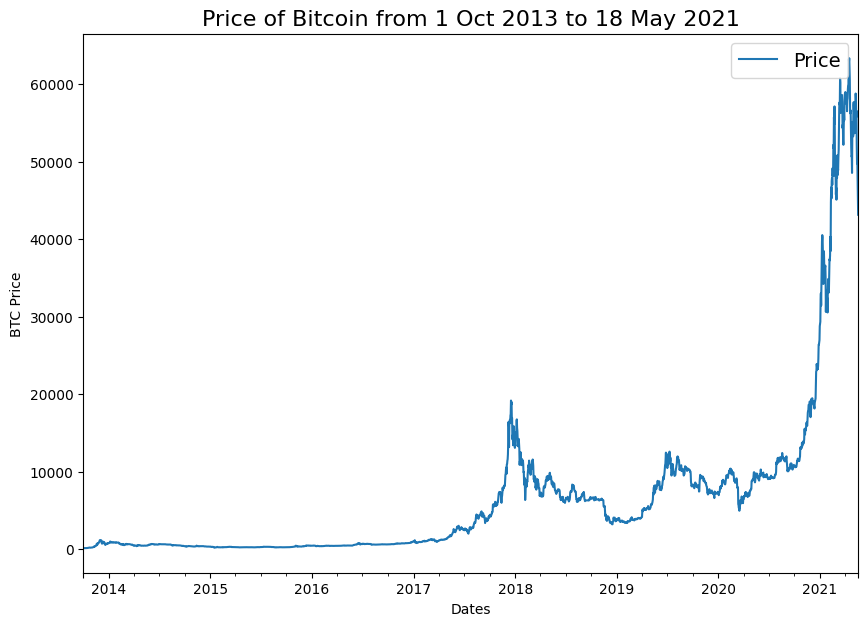

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Dates')
plt.legend(fontsize=14);

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))


# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

# Create train and test sets for time series (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test split for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  # dates
                                                    prices,     # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

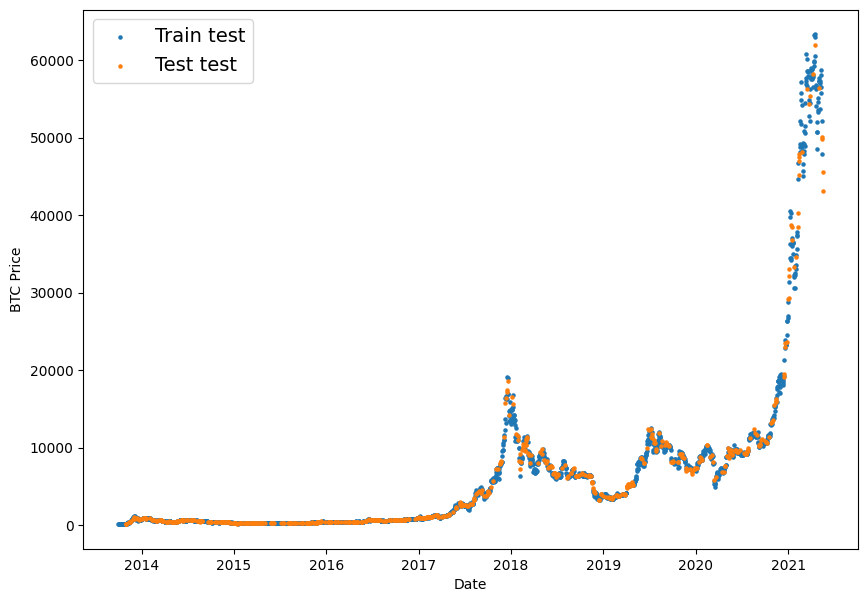

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train test')
plt.scatter(X_test, y_test, s=5, label='Test test')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

# Correct way

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices))     # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create train data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

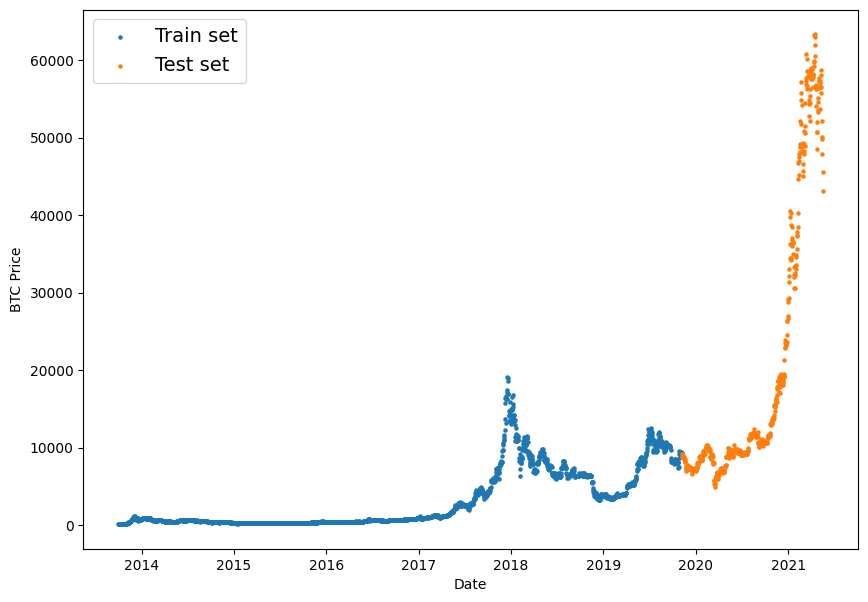

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train set')
plt.scatter(X_test, y_test, s=5, label='Test set')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

# Naive Bayes Model

In [15]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

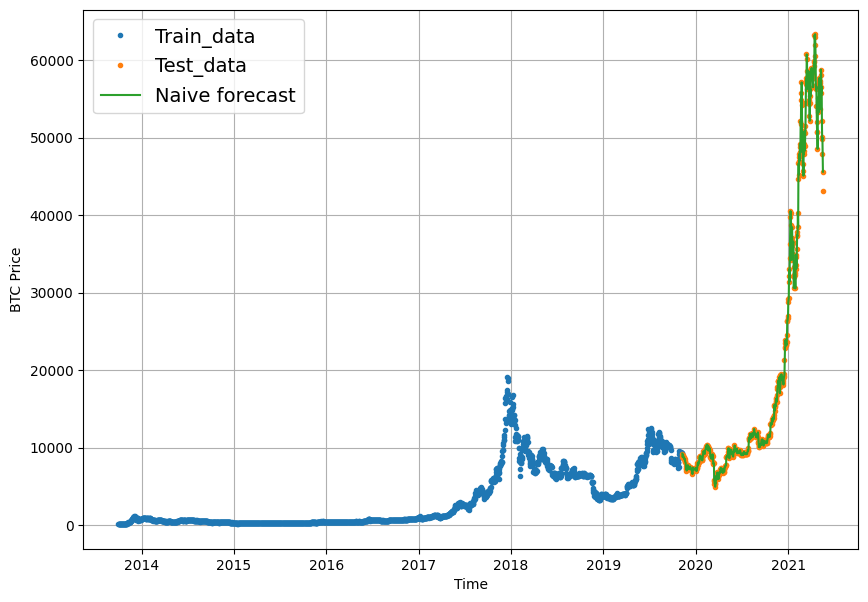

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train_data')
plot_time_series(timesteps=X_test, values=y_test, label='Test_data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive forecast')


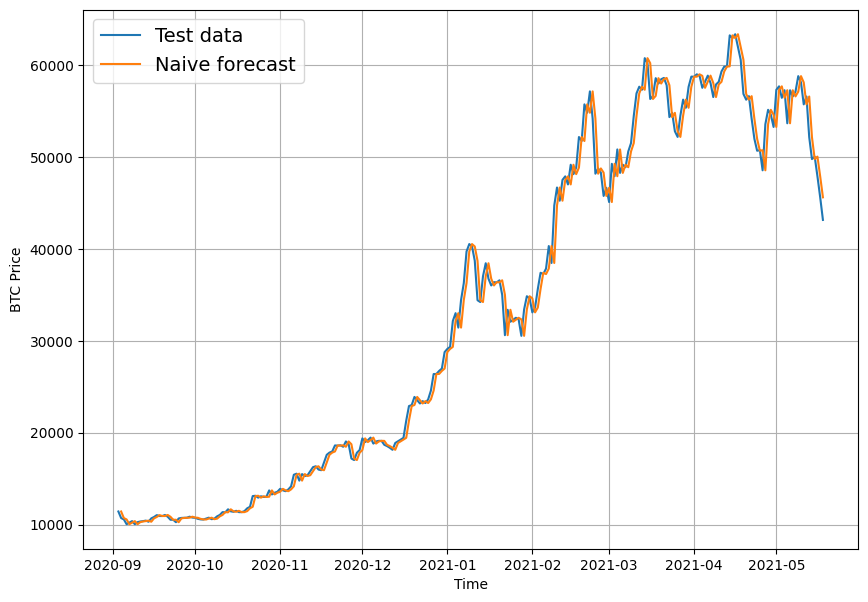

In [17]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', start=offset, label='Naive forecast')

In [18]:
# import tensorflow
import tensorflow as tf

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))    # our seasonality is one day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)   # puts and emphasis on outlier (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [24]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """

  return x[:, :-horizon], x[:, -horizon:]

# From here

In [168]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: 1 -> Label: [2 3 4 5 6 7 8]


In [169]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns 1D array into a 2D array of sequential windows of window_size
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f'Window step:\n {window_step}')

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T    # create 2D array of windows of size window_size
  # print(f'Window indexes:\n {winow_indexes[:3], window_indexes[-3:], window_indexes.shape})

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [170]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [171]:
# View the first 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188

In [172]:
# View the last 3 windows/laels
for i in range(3):
  print(f'Window {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window [58171.9090187  59295.95004401 59822.90167743 59853.19724227
 63223.88439079 62926.5571759  63346.78903511 61965.7825981
 60574.44472823 56850.83016569 56224.10158771 56608.76974839
 54144.42747606 51965.05955941 50669.14438218 50733.76950364
 48542.95220298 53558.70784462 55123.86198142 54591.51532554
 53260.29534115 57302.64642408 57677.9752219  56427.04312502
 57255.30683756 53658.84312082 57252.7021845  56583.84987917
 57107.12067189 58788.20967893] -> Label: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]
Window [59295.95004401 59822.90167743 59853.19724227 63223.88439079
 62926.5571759  63346.78903511 61965.7825981  60574.44472823
 56850.83016569 56224.10158771 56608.76974839 54144.42747606
 51965.05955941 50669.14438218 50733.76950364 48542.95220298
 53558.70784462 55123.86198142 54591.51532554 53260.29534115
 57302.64642408 57677.9752219  56427.04312502 57255.30683756
 53658.84312082 57252.7021845  56583.8498791

In [173]:
# Make the train test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into tain and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, train_labels, test_windows, test_labels

In [174]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [175]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [176]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),   # create filepath to save model
                                            verbose=0,    # only output a limited amount of text
                                            save_best_only=True)  # save only the best model to file

# Model 1: Dense Model (window = 7, horizon = 1)

In [177]:
import tensorflow as tf
from tensorflow.keras import layers

In [178]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [179]:
model_1.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [180]:
model_1_history = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 56ms/step - loss: 1892.9868 - mean_absolute_error: 1892.9868 - val_loss: 3098.9299 - val_mean_absolute_error: 3098.9299
Epoch 2/100
18/18 [==============================] - 1s 47ms/step - loss: 576.6585 - mean_absolute_error: 576.6585 - val_loss: 2479.4229 - val_mean_absolute_error: 2479.4229
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 441.1717 - mean_absolute_error: 441.1717 - val_loss: 2013.7101 - val_mean_absolute_error: 2013.7101
Epoch 4/100
18/18 [==============================] - 1s 29ms/step - loss: 398.8335 - mean_absolute_error: 398.8335 - val_loss: 1951.3898 - val_mean_absolute_error: 1951.3898
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 367.2124 - mean_absolute_error: 367.2124 - val_loss: 1842.1991 - val_mean_absolute_error: 1842.1991
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 342.7095 - mean_absolute_error: 342.7095 - val_loss: 1

In [181]:
model_1.name

'sequential_17'

In [182]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1263.4951 - mean_absolute_error: 1263.4951


[1263.4951171875, 1263.4951171875]

In [183]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model('/content/model_experiments/sequential_1')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1230.2744 - mean_absolute_error: 1230.2744


[1230.2744140625, 1230.2744140625]

In [184]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)     # return 1D array of predictions


In [185]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(551,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[9141.812, 9388.567, 9415.538, 9380.273, 9437.528, 9523.555,
         9468.327],
        [8757.632, 8988.586, 8901.16 , 9086.809, 9207.8  , 9042.148,
         9135.355],
        [8709.111, 8827.806, 8773.305, 9073.758, 9134.357, 8815.779,
         8956.235],
        [8852.722, 8996.696, 8954.631, 9254.171, 9251.792, 9132.727,
         8963.25 ],
        [8771.464, 8981.413, 9002.684, 9237.492, 8966.019, 9047.499,
         8843.228],
        [8713.118, 8963.093, 9068.369, 9013.021, 8900.867, 8964.736,
         8743.445],
        [8566.946, 8932.046, 9084.221, 8971.156, 8904.118, 8891.275,
         8736.788],
        [8486.776, 8844.824, 8835.229, 8830.547, 8678.307, 8382.709,
         8588.961],
        [8396.085, 8717.011, 8556.494, 8497.342, 8660.117, 8283.971,
         8454.027],
        [8257.615, 8480.187, 8361.587, 8450.467, 8424.652, 8267.885,
         8487.966]], dtype=float32)>)

In [186]:
# Evaluate preds
model_1_reults = evaluate_preds(y_true=tf.squeeze(test_labels),   # reduce to right shape
                                y_pred=model_1_preds)
model_1_reults

{'mae': array([ 600.44226 ,  303.81738 ,  300.64188 ,  431.40375 ,  424.19476 ,
         457.34634 ,  529.03516 ,  450.8519  ,  490.11545 ,  596.4389  ,
         759.3236  ,  760.41534 ,  746.35614 ,  752.73987 ,  486.49094 ,
         189.80748 ,  176.5415  ,  319.64133 ,  299.81772 ,  311.98325 ,
         120.969795,  165.85484 ,  239.99944 ,  222.52742 ,  143.79367 ,
         130.13045 ,   95.91036 ,  165.75594 ,   79.01988 ,  160.71812 ,
         283.36148 ,  342.51758 ,  265.76688 ,  322.49002 ,  251.38867 ,
         281.2193  ,  265.5782  ,  263.62598 ,  202.57896 ,  206.32596 ,
         515.61835 ,  122.366905,   63.21631 ,  121.21038 ,  144.07945 ,
         122.12835 ,  100.31285 ,   98.35387 ,   76.25    ,   97.3162  ,
         159.68416 ,  187.31592 ,  194.66504 ,  175.12172 ,  264.47476 ,
         372.86734 ,  578.716   ,  584.9388  ,  518.1079  ,  621.40857 ,
         405.7221  ,  257.303   ,  282.76855 ,  350.2513  ,  414.8517  ,
         479.6739  ,  527.70624 ,  590.97955

# Model 2

In [132]:
# Model 2
WINDOW_SIZE = 30
HORIZON = 1

In [133]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(WINDOW_SIZE + 1)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] -> Label: 31


In [134]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [135]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [136]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [137]:
model_2.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [138]:
model_2_history = model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 970.5702 - mean_absolute_error: 970.5702 - val_loss: 2112.7908 - val_mean_absolute_error: 2112.7908
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 434.7043 - mean_absolute_error: 434.7043 - val_loss: 1483.9215 - val_mean_absolute_error: 1483.9215
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 273.7751 - mean_absolute_error: 273.7751 - val_loss: 1709.2178 - val_mean_absolute_error: 1709.2178
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 233.4492 - mean_absolute_error: 233.4492 - val_loss: 1186.5095 - val_mean_absolute_error: 1186.5096
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 202.9832 - mean_absolute_error: 202.9832 - val_loss: 1126.5836 - val_mean_absolute_error: 1126.5836
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 194.8608 - mean_absolute_error: 194.8608 - val_loss: 1040

# Model 3

In [139]:
# Model 3
WINDOW_SIZE = 30
HORIZON = 7

In [140]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(WINDOW_SIZE + 7)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] -> Label: [31 32 33 34 35 36 37]


In [141]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [142]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [143]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [144]:
model_3.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [145]:
model_3_history = model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 38ms/step - loss: 1415.3441 - mean_absolute_error: 1415.3441 - val_loss: 2473.0576 - val_mean_absolute_error: 2473.0576
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 493.5181 - mean_absolute_error: 493.5181 - val_loss: 2488.0225 - val_mean_absolute_error: 2488.0225
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 398.3936 - mean_absolute_error: 398.3936 - val_loss: 2222.2610 - val_mean_absolute_error: 2222.2610
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 355.2292 - mean_absolute_error: 355.2292 - val_loss: 1764.7886 - val_mean_absolute_error: 1764.7886
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 329.1742 - mean_absolute_error: 329.1742 - val_loss: 1641.6630 - val_mean_absolute_error: 1641.6630
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 315.8254 - mean_absolute_error: 315.8254 - val_loss: 171

# Model 4

In [146]:
# Model 4
WINDOW_SIZE = 30
HORIZON = 7

In [147]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(WINDOW_SIZE + 7)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] -> Label: [31 32 33 34 35 36 37]


In [148]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [149]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [150]:
# Expand dimensions of your data
train_windows = np.expand_dims(train_windows, axis=-1)
test_windows = np.expand_dims(test_windows, axis=-1)

In [151]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(HORIZON)
])

In [152]:
model_4.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [153]:
model_4_history = model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 2s 48ms/step - loss: 1115.1903 - mean_absolute_error: 1115.1903 - val_loss: 4821.3770 - val_mean_absolute_error: 4821.3770
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 511.6947 - mean_absolute_error: 511.6947 - val_loss: 2919.3647 - val_mean_absolute_error: 2919.3647
Epoch 3/100
18/18 [==============================] - 1s 58ms/step - loss: 424.5900 - mean_absolute_error: 424.5900 - val_loss: 1869.5465 - val_mean_absolute_error: 1869.5465
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 382.7431 - mean_absolute_error: 382.7431 - val_loss: 2016.3523 - val_mean_absolute_error: 2016.3523
Epoch 5/100
18/18 [==============================] - 1s 63ms/step - loss: 352.1255 - mean_absolute_error: 352.1255 - val_loss: 1631.9999 - val_mean_absolute_error: 1631.9999
Epoch 6/100
18/18 [==============================] - 1s 59ms/step - loss: 328.4856 - mean_absolute_error: 328.4856 - val_loss: 1

# Model 5 - RNN

In [154]:
# Model 4
WINDOW_SIZE = 30
HORIZON = 7

In [155]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(WINDOW_SIZE + 7)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] -> Label: [31 32 33 34 35 36 37]


In [156]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [157]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [158]:
# Expand dimensions of your data
train_windows = np.expand_dims(train_windows, axis=-1)
test_windows = np.expand_dims(test_windows, axis=-1)

In [159]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(HORIZON)
])

In [160]:
model_5.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [161]:
model_5_history = model_5.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 9s 226ms/step - loss: 2847.0337 - mean_absolute_error: 2847.0337 - val_loss: 16241.2432 - val_mean_absolute_error: 16241.2432
Epoch 2/100
18/18 [==============================] - 3s 191ms/step - loss: 2499.4111 - mean_absolute_error: 2499.4111 - val_loss: 12820.9033 - val_mean_absolute_error: 12820.9033
Epoch 3/100
18/18 [==============================] - 3s 149ms/step - loss: 2980.7402 - mean_absolute_error: 2980.7402 - val_loss: 16674.3281 - val_mean_absolute_error: 16674.3281
Epoch 4/100
18/18 [==============================] - 4s 253ms/step - loss: 2841.5867 - mean_absolute_error: 2841.5867 - val_loss: 11967.1172 - val_mean_absolute_error: 11967.1172
Epoch 5/100
18/18 [==============================] - 5s 266ms/step - loss: 2131.4309 - mean_absolute_error: 2131.4309 - val_loss: 7502.8623 - val_mean_absolute_error: 7502.8623
Epoch 6/100
18/18 [==============================] - 1s 82ms/step - loss: 2550.1497 - mean_absolute_error: 

# Comparison

In [190]:
mae_1 = model_1_history.history['mean_absolute_error'][-1]
mae_2 = model_2_history.history['mean_absolute_error'][-1]
mae_3 = model_3_history.history['mean_absolute_error'][-1]
mae_4 = model_4_history.history['mean_absolute_error'][-1]
mae_5 = model_5_history.history['mean_absolute_error'][-1]

In [216]:
val_mae_1 = model_1_history.history['val_mean_absolute_error'][-1]
val_mae_2 = model_2_history.history['val_mean_absolute_error'][-1]
val_mae_3 = model_3_history.history['val_mean_absolute_error'][-1]
val_mae_4 = model_4_history.history['val_mean_absolute_error'][-1]
val_mae_5 = model_5_history.history['val_mean_absolute_error'][-1]

In [218]:
names = ['mae_1', 'mae_2', 'mae_3', 'mae_4', 'mae_5']
val_names = ['val_mae_1', 'val_mae_2', 'val_mae_3', 'val_mae_4', 'val_mae_5']


<ipython-input-222-4a9f05c7377b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'MAE of validation')

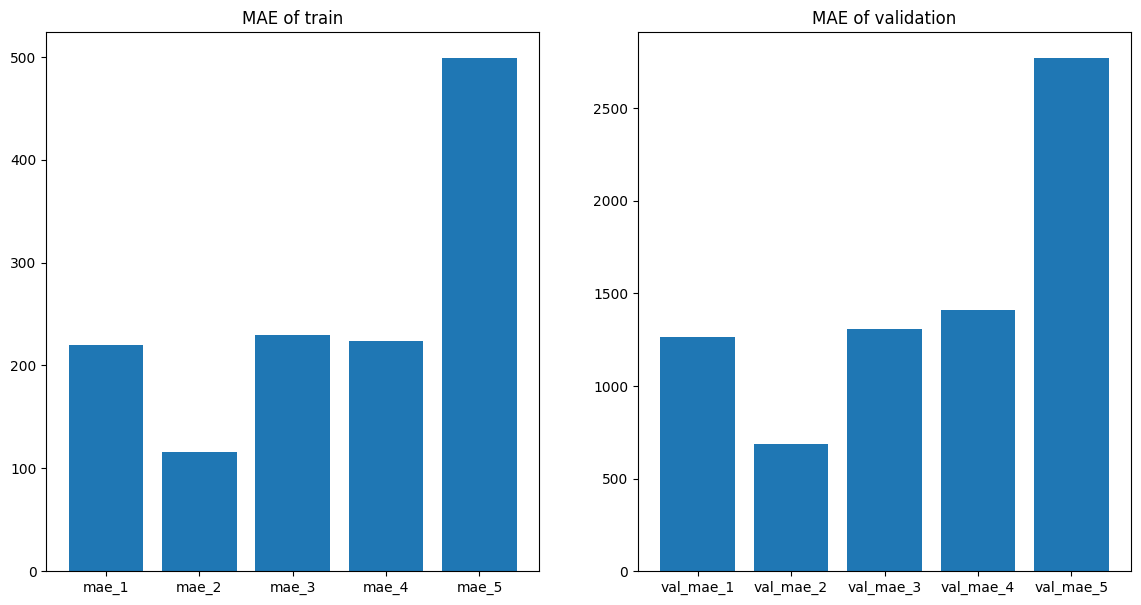

In [222]:
fig, ax = plt.subplots(figsize=(14, 7))
plt.subplot(121)
plt.bar(names, [mae_1, mae_2, mae_3, mae_4, mae_5])
plt.title("MAE of train")
plt.subplot(122)
plt.bar(val_names, [val_mae_1, val_mae_2, val_mae_3, val_mae_4, val_mae_5])
plt.title("MAE of validation")

In [205]:
for n in mae_list:
  plt.plot(n.keys(), n.values(), kind='bar')
  if n == mae_5:
    plt.title('Mean Absloute Error of Train')

AttributeError: 'str' object has no attribute 'keys'